Задачи 
- Ознакомиться с задачей регрессии 
- Изучить отличие задачи регрессии от задачи классификации 
- Создать модель 
- Настроить параметры обучения 
- Обучить и оценить модели 
- Ознакомиться с перекрестной проверкой

In [10]:
import numpy as np 
import matplotlib as plt
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.datasets import boston_housing 
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() 
print(train_data.shape) 
print(test_data.shape) 
print(test_targets)

(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


404 обучающих и 102 контрольных образца, каждый с 13 числовыми признаками. 
Цены в основном находятся в диапазоне от 10 000 до 50 000 долларов США. 
Было бы проблематично передать в нейронную сеть значения, имеющие самые разные 
диапазоны. Сеть, конечно, сможет автоматически адаптироваться к таким разнородным 
данным, однако это усложнит обучение. На практике к таким данным принято применять 
нормализацию:  для  каждого  признака  во  входных  данных  (столбца  в  матрице  входных 
данных) из каждого значения вычитается среднее по этому признаку, и разность делится 
на стандартное отклонение, в результате признак центрируется по нулевому значению и 
имеет стандартное отклонение, равное единице. Такую нормализацию легко выполнить с 
помощью Numpy

In [3]:
mean = train_data.mean(axis=0) 
train_data -= mean 
std = train_data.std(axis=0) 
train_data /= std 
test_data -= mean 
test_data /= std 

In [4]:
def build_model(): 
    model = Sequential() 
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],))) 
    model.add(Dense(64, activation='relu')) 
    model.add(Dense(1)) 

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
    return model 

Сеть заканчивается одномерным слоем, не имеющим функции активации (это линейный 
слой).  Это  типичная  конфигурация  для  скалярной  регрессии  (целью  которой  является 
предсказание одного значения на непрерывной числовой прямой). Применение функции 
активации могло бы ограничить диапазон выходных значений: например, если в последнем 
слое  применить  функцию  активации  sigmoid,  сеть  обучилась  бы  предсказывать  только 
значения из диапазона между 0 и 1. 
В данном случае, с линейным последним слоем, сеть способна предсказывать значения из 
любого диапазона. 
  
Обратите внимание на то, что сеть компилируется с функцией потерь mse — mean squared 
error (среднеквадратичная  ошибка),  вычисляющей  квадрат  разности  между 
предсказанными и целевыми значениями. Эта функция широко используется в  задачах 
регрессии. Также добавлен новый параметр на этапе обучения: mae — mean absolute error 
(средняя абсолютная ошибка). Это абсолютное значение разности между предсказанными 
и целевыми значениями. Например, значение MAE, равное 0,5, в этой задаче означает, что 
в среднем прогнозы отклоняются на 500 долларов США. 
  
Чтобы оценить качество сети в ходе корректировки ее параметров (таких, как количество 
эпох обучения), можно разбить исходные данные на обучающий и проверочный наборы, 
как это делалось в предыдущих примерах. Однако так как у нас и без того небольшой набор 
данных, проверочный набор получился бы слишком маленьким (скажем, что-нибудь около 
100 образцов). Как следствие, оценки при проверке могут сильно меняться в зависимости 
от того, какие данные попадут в проверочный и обучающий наборы: оценки при проверке 
могут  иметь  слишком  большой  разброс.  Это  не  позволит  надежно  оценить  качество 
модели. 
Хорошей практикой в таких ситуациях является применение перекрестной проверки по K 
блокам (K-fold cross-validation). Суть ее заключается в разделении доступных данных на K 
блоков (обычно K = 4 или 5), создании K идентичных моделей и обучении каждой на K—1 
блоках с оценкой по оставшимся блокам. По полученным K оценкам вычисляется среднее 
значение, которое принимается как оценка модели. В коде такая проверка реализуется 
достаточно просто. 

Параметры:
- k — количество блоков для кросс-валидации (разделений), здесь 4, то есть модель будет обучена на 75% данных и протестирована на 25% данных в каждом из четырёх циклов.
- num_val_samples — количество образцов в каждом блоке валидации.
- num_epochs — количество эпох обучения для каждой итерации.
- all_scores — список для хранения результатов на каждом блоке (средняя абсолютная ошибка).

In [5]:
k = 4 
num_val_samples = len(train_data) // k 
num_epochs = 100 
all_scores = []

In [8]:
 
for i in range(k): 
    print('processing fold #', i) 
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] 
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0) 
    partial_train_targets = np.concatenate( 
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0) 

    
    model = build_model() 
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0) 
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) 
    all_scores.append(val_mae) 
print(np.mean(all_scores))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.4901404778162637


 
Разные прогоны действительно показывают разные оценки, от 2,6 до 3,2. Средняя (3,0) 
выглядит более достоверно, чем любая из оценок отдельных прогонов, — в этом главная 
ценность перекрестной проверки по K блокам. В данном случае средняя ошибка составила 
3000 долларов, что довольно много, если вспомнить, что цены колеблются в диапазоне от 
10 000 до 50 000 долларов.

Необходимо  уменьшить  или  увеличить  количество  эпох  обучения  и 
проанализировать полученные результаты 


Training for 50 epochs
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3

Training for 100 epochs
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3

Training for 150 epochs
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3

Training for 200 epochs
Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


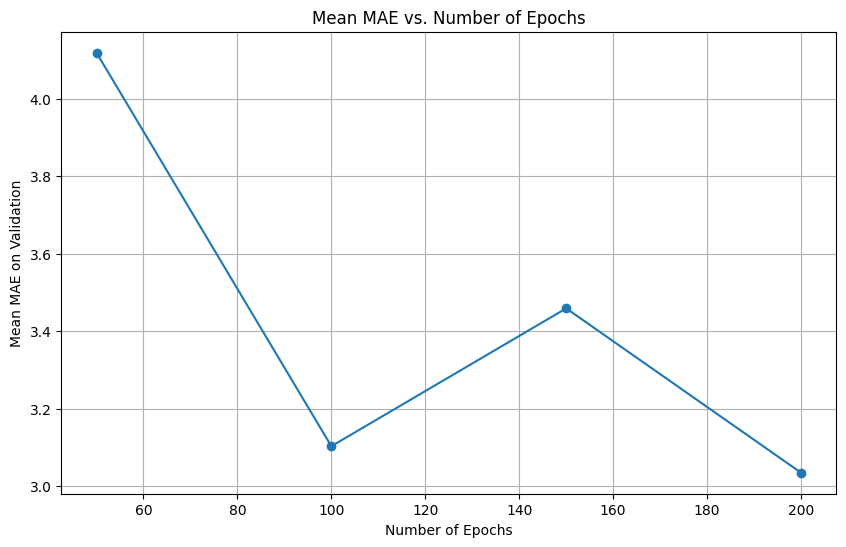

In [12]:
# Диапазон значений количества эпох для экспериментов
epoch_values = [50, 100, 150, 200]
results = {}

# Перебор различных значений количества эпох
for num_epochs in epoch_values:
    print(f"\nTraining for {num_epochs} epochs")
    all_scores = []
    
    # Кросс-валидация с 4 блоками
    for i in range(k): 
        print('Processing fold #', i)
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
        
        # Создаём и обучаем модель
        model = build_model()
        model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
        
        # Оцениваем на валидационной выборке
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
    
    # Сохраняем результаты для текущего значения эпох
    results[num_epochs] = all_scores

# Построение графиков средних значений MAE для каждого количества эпох
import matplotlib.pyplot as plt

# Средние ошибки MAE
mean_mae_scores = [np.mean(results[epochs]) for epochs in epoch_values]

plt.figure(figsize=(10, 6))
plt.plot(epoch_values, mean_mae_scores, marker='o')
plt.xlabel("Number of Epochs")
plt.ylabel("Mean MAE on Validation")
plt.title("Mean MAE vs. Number of Epochs")
plt.grid()
plt.show()

### Объяснить различия задач классификации и регрессии 

1) Задача регрессии – прогноз на основе выборки объектов с различными признаками. На выходе должно получиться вещественное число (2, 35, 76.454 и др.), к примеру цена квартиры, стоимость ценной бумаги по прошествии полугода, ожидаемый доход магазина на следующий месяц, качество вина при слепом тестировании.

2) Задача классификации – получение категориального ответа на основе набора признаков. Имеет конечное количество ответов (как правило, в формате «да» или «нет»): есть ли на фотографии кот, является ли изображение человеческим лицом, болен ли пациент раком.

3) Задача кластеризации – распределение данных на группы: разделение всех клиентов мобильного оператора по уровню платёжеспособности, отнесение космических объектов к той или иной категории (планета, звёзда, чёрная дыра и т. п.).

4) Задача уменьшения размерности – сведение большого числа признаков к меньшему (обычно 2–3) для удобства их последующей визуализации (например, сжатие данных).